In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def imshow(img):
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

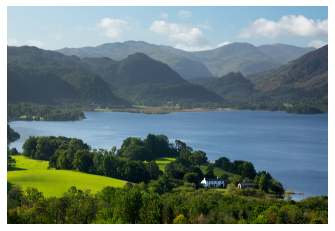

In [3]:
image = cv2.imread("assets/Derwentwater-Cumbria-North-West.jpg")
imshow(image)

### Canny

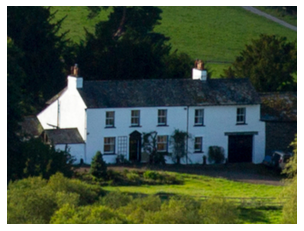

In [4]:
src_img = cv2.imread("assets/house.png")
src_img = cv2.resize(src_img, (640, 480))
imshow(src_img)

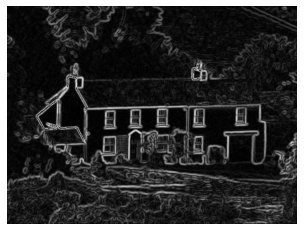

In [5]:
# conversion of image to grayscale 
img_gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY) 

# Noise reduction step 
img_gray_blur = cv2.GaussianBlur(img_gray, (5, 5), 1.4)

# Calculating the gradients 
gx = cv2.Sobel(np.float32(img_gray_blur), cv2.CV_64F, 1, 0, 3) 
gy = cv2.Sobel(np.float32(img_gray_blur), cv2.CV_64F, 0, 1, 3) 

# Conversion of Cartesian coordinates to polar  
mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
imshow(np.uint8(mag))

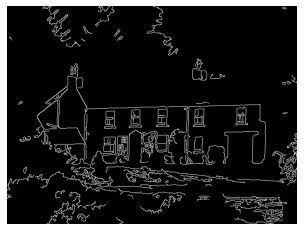

In [6]:
edges = cv2.Canny(img_gray, 70, 200)
imshow(edges)

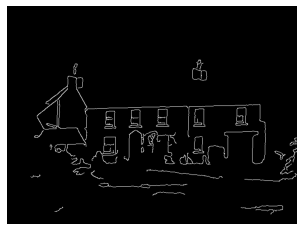

In [7]:
edges = cv2.Canny(img_gray_blur, 70, 200)
imshow(edges)

### Sobel

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


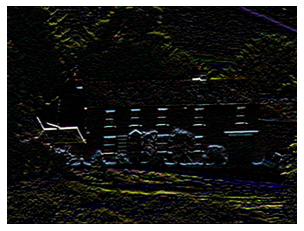

In [8]:
kernel = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])
print(kernel)
dst_img = cv2.filter2D(src_img, -1, kernel)
imshow(dst_img)

### Laplacian

[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


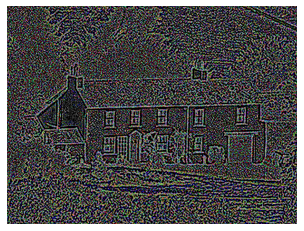

In [9]:
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])
print(kernel)
dst_img = cv2.filter2D(src_img, -1, kernel)
imshow(dst_img*50)

### Laplacian + blur

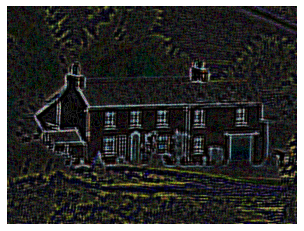

In [10]:
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])
dst_img = cv2.blur(src_img, (10, 10))
dst_img = cv2.filter2D(dst_img,-1,kernel)
imshow(dst_img*50)

### Prewitt

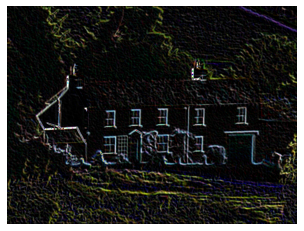

In [11]:
kernel_x = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
kernel_y = np.array([[-1,0,1],
                     [-1,0,1],
                     [-1,0,1]])
img_prewitt_x = cv2.filter2D(src_img, -1, kernel_x)
img_prewitt_y = cv2.filter2D(src_img, -1, kernel_y)
imshow(img_prewitt_x+img_prewitt_y)

### Roberts

In [12]:
img = cv2.imread("assets/house.png",0).astype('float64')
img /= 255.0

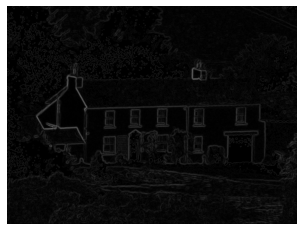

In [13]:
roberts_cross_v = np.array([[1,0],
                            [0,-1]])
roberts_cross_h = np.array([[0,1],
                            [-1,0]])
vertical = ndimage.convolve(img, roberts_cross_v)
horizontal = ndimage.convolve(img, roberts_cross_h)
  
edged_img = np.sqrt(np.square(horizontal) + np.square(vertical))
edged_img *= 255
cv2.imwrite("output.jpg",edged_img)

image = cv2.imread("./output.jpg")
imshow(image)